In [106]:
import ccxt
import datetime
import dateutil.parser
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from scipy.interpolate import interp1d
from talib import RSI, EMA
import warnings
warnings.filterwarnings('ignore')

**Load historical XBTUSD market data**

The Open, High, Low, Close (OHLC or candle) data here ranges from 01-Jan-2019 to 01-Nov-2020

In [107]:
df = pd.read_parquet(r'C:\Users\Nomade05\Elie code\Datas\XBTUSD.parquet')

print(f'{len(df)} market data points')
df.head()

966240 market data points


,time,open,high,low,close,vol
0,2019-01-01 00:01:00,3693.0,3694.5,3693.0,3694.5,891545.0
1,2019-01-01 00:02:00,3694.5,3694.5,3690.5,3690.5,658961.0
2,2019-01-01 00:03:00,3690.5,3691.0,3690.5,3690.5,196138.0
3,2019-01-01 00:04:00,3690.5,3691.0,3690.0,3690.0,263296.0
4,2019-01-01 00:05:00,3690.0,3690.5,3688.5,3688.5,716426.0


## RSI  

- The relative strength index (RSI) is a popular momentum oscillator introduced in 1978.
- The RSI provides technical traders with signals about bullish and bearish price momentum
- An asset is usually considered overbought when the RSI is above 70 and oversold when it is below 30.
- The RSI line crossing below the overbought line or above oversold line is often seen by traders as a signal to buy or sell.
- The RSI works best in trading ranges rather than trending markets.

**Calculate RSI TA-Lib package**  

Use default 14 time period for Relative Strenght Index (RSI)

In [108]:
df['rsi'] = RSI(df['close'])
df.head(20)

,time,open,high,low,close,vol,rsi
0,2019-01-01 00:01:00,3693.0,3694.5,3693.0,3694.5,891545.0,NaN
1,2019-01-01 00:02:00,3694.5,3694.5,3690.5,3690.5,658961.0,NaN
2,2019-01-01 00:03:00,3690.5,3691.0,3690.5,3690.5,196138.0,NaN
3,2019-01-01 00:04:00,3690.5,3691.0,3690.0,3690.0,263296.0,NaN
4,2019-01-01 00:05:00,3690.0,3690.5,3688.5,3688.5,716426.0,NaN
5,2019-01-01 00:06:00,3688.5,3689.0,3688.5,3688.5,105867.0,NaN
6,2019-01-01 00:07:00,3688.5,3689.0,3686.0,3686.0,883486.0,NaN
7,2019-01-01 00:08:00,3686.0,3686.5,3684.5,3684.5,334053.0,NaN
8,2019-01-01 00:09:00,3684.5,3685.0,3684.5,3685.0,62139.0,NaN
9,2019-01-01 00:10:00,3685.0,3685.5,3684.5,3685.5,681316.0,NaN


**Distribution of RSI**

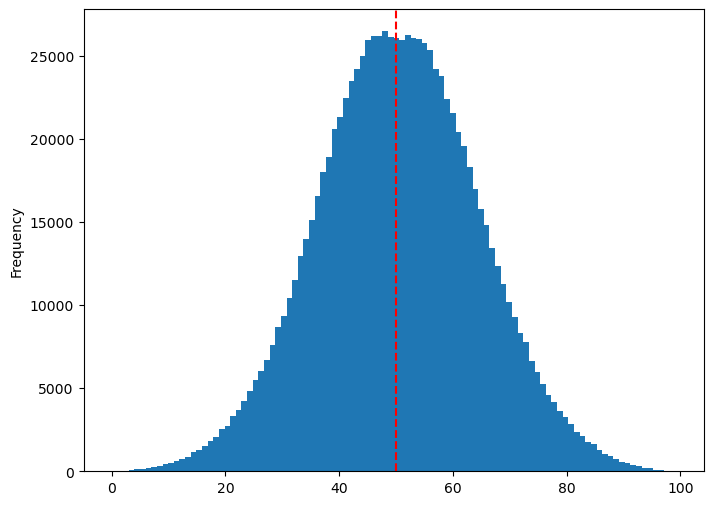

In [109]:
df['rsi'].plot(kind='hist', bins=100, figsize=(8, 6))
plt.axvline(50, color='red', linestyle='--')

**Plot close price vs RSI for a time period**

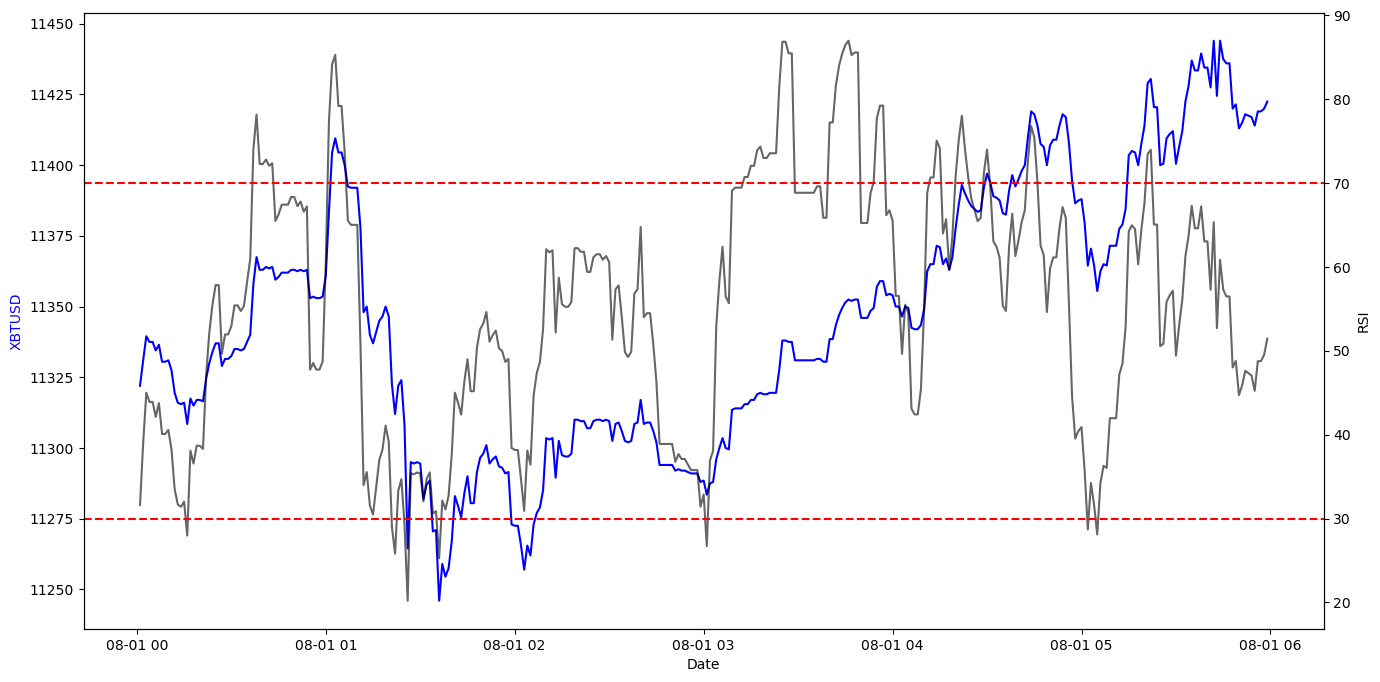

In [110]:
start_time = datetime.datetime(2020, 8, 1, 0)
end_time = datetime.datetime(2020, 8, 1, 6)

xf = df[(df['time'] > start_time) & (df['time'] < end_time)]

fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

ax1.plot(xf['time'], xf['close'], 'b-')
ax2.plot(xf['time'], xf['rsi'], 'k-', alpha=0.6)

ax1.set_xlabel('Date')
ax1.set_ylabel('XBTUSD', color='b')
ax2.set_ylabel('RSI', color='k')

ax2.axhline(70, color='red', linestyle='--')
ax2.axhline(30, color='red', linestyle='--')

## Bollinger Bands 

Bollinger Bands consist of :
- an N-period moving average (MA), 
- an upper band at K times an N-period standard deviation above the moving average (MA + Kσ), 
- and a lower band at K times an N-period standard deviation below the moving average (MA − Kσ).

Typical values for N and K are **20** days and **2**, respectively.

In [111]:
xf['Middle Band'] = xf['close'].rolling(window=20).mean() 
xf['Lower Band'] = xf['Middle Band'] - 2*xf['close'].rolling(window=20).std()
xf['Upper Band'] = xf['Middle Band'] + 2*xf['close'].rolling(window=20).std()
xf

,time,open,high,low,close,vol,rsi,Middle Band,Lower Band,Upper Band
832260,2020-08-01 00:01:00,11327.0,11327.0,11315.0,11322.0,3204636.0,31.603257,NaN,NaN,NaN
832261,2020-08-01 00:02:00,11322.0,11331.0,11322.5,11331.0,474376.0,38.976827,NaN,NaN,NaN
832262,2020-08-01 00:03:00,11331.0,11339.5,11331.0,11339.5,624598.0,45.006764,NaN,NaN,NaN
832263,2020-08-01 00:04:00,11339.5,11339.5,11329.0,11337.5,435000.0,43.907376,NaN,NaN,NaN
832264,2020-08-01 00:05:00,11337.5,11338.0,11334.0,11337.5,316398.0,43.907376,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
832614,2020-08-01 05:55:00,11417.0,11417.5,11413.5,11414.0,125983.0,45.238843,11428.050,11407.288446,11448.811554
832615,2020-08-01 05:56:00,11414.0,11419.0,11413.5,11419.0,980286.0,48.771520,11427.325,11406.353152,11448.296848
832616,2020-08-01 05:57:00,11419.0,11419.0,11418.5,11419.0,87509.0,48.771520,11426.600,11405.524696,11447.675304
832617,2020-08-01 05:58:00,11419.0,11420.5,11418.5,11420.0,515708.0,49.526772,11425.625,11405.270575,11445.979425


Text(0, 0.5, 'XBTUSD')

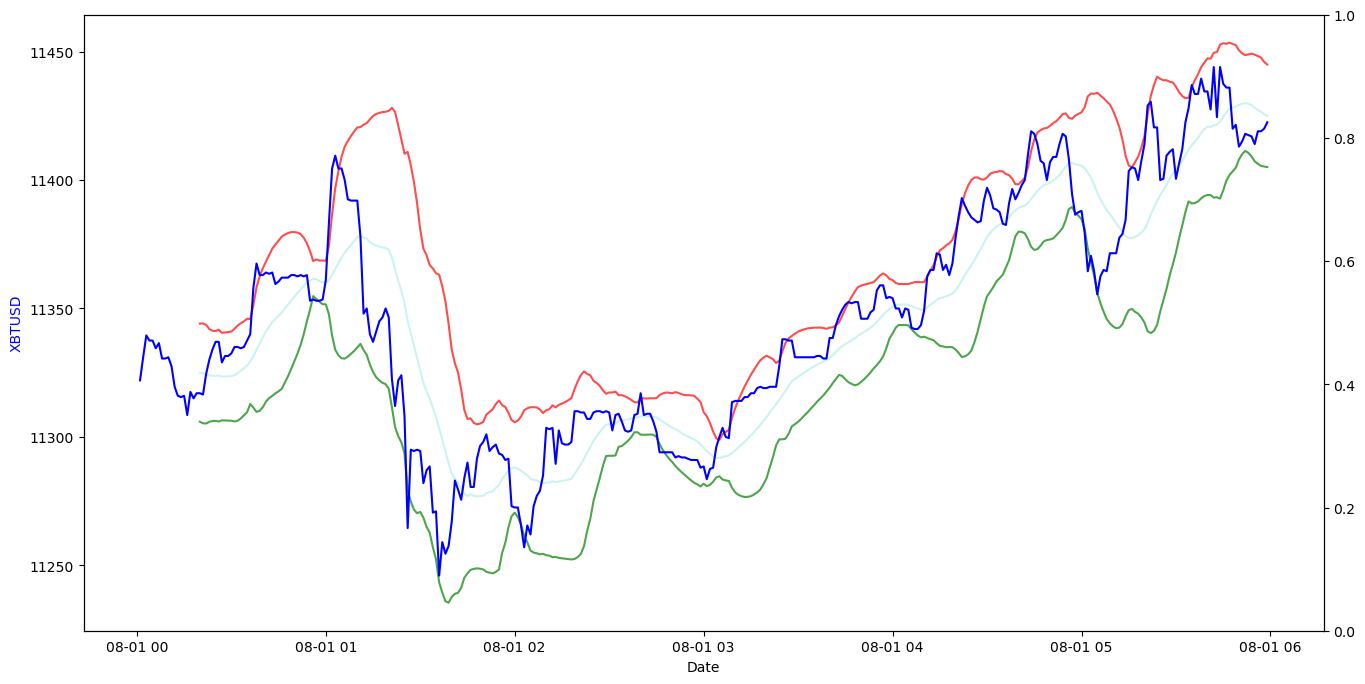

In [112]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

ax1.plot(xf['time'], xf['Middle Band'], 'c-', alpha=0.2)
ax1.plot(xf['time'], xf['Lower Band'], 'g-', alpha=0.7)
ax1.plot(xf['time'], xf['Upper Band'], 'r-', alpha=0.7)
ax1.plot(xf['time'], xf['close'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('XBTUSD', color='b')